# DS4A Project - Team 18 - Vaccine Acceptance

## The problem

**Problem Statement:** One or many COVID-19 vaccines will become available to the general public in the next few months and years. Broad acceptance of these vaccines is thought to be fundamental to fight the global pandemic. At the same time, news outlets report rising numbers in “anti-vaxxers”. It is therefore critical for governments and healthcare systems to understand what social and socio-economic factors lead to people not accepting a new vaccination so that problematic factors can be addressed by policies. While vaccines for the COVID-19 virus are still under development and not yet available, it would be of interest to predict their uptake by the general public. This project will revisit the US public health response to a different recent major respiratory disease pandemic, the swine flu H1N1.


**Which question(s) do you want to explore? Why do you think this particular question is interesting?:** (1-2 paragraphs elaborating on the project’s relevance) The project will analyse the question which social and socio-economic factors have had the biggest influence on people’s decision to get the H1N1 and/or the seasonal flu in late 2009 and early 2010 in the US. We will in addition create a predictive model, whether people got the H1N1 and/or seasonal flu vaccines using information they shared about their backgrounds, opinions, and health behaviours.
Thanks to the similarities between the H1N1 pandemic and the COVID-19 pandemic, the identification of factors facilitating vaccine refusal will have a direct public health policy implication. In particular, these factors can be targeted by policymakers and healthcare providers to increase COVID-19 vaccine uptake in the current pandemic.
The predictive model trained on H1N1 data can be used by healthcare providers to identify individuals with a low probability of vaccine acceptance, which can be specifically targeted with additional information or relevant interventions. Furthermore, once the first COVID-19 vaccines are released, the model can be easily converted to an individual-level COVID-19 vaccine uptake predictor by transfer learning.


**Which datasets do you plan to use? Why? Are there any data sources that you have failed to find?:** In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviours towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.
The data can be found here: https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/ 

**Please describe the plan or methodology that you will use to answer your question:** (1-2 sentence description of statistical analysis techniques) For feature identification: We will start with simple correlation analysis, principal component analysis for dimension reduction and, when having built more complex classifiers, like decision trees or random forests, we will analyse them for feature importance.
For model building: We will start with simple methods like logistic regression and continue with random forest, SVM or NN classifiers to achieve the best prediction results.


## Discovering the data

**Features:**
You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

- h1n1_concern - Level of concern about the H1N1 flu.
        0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- h1n1_knowledge - Level of knowledge about H1N1 flu.
        0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- behavioral_antiviral_meds - Has taken antiviral medications. (binary)
- behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
- behavioral_face_mask - Has bought a face mask. (binary)
- behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
- behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
- behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
- behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
- doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
- doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
- chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
- health_worker - Is a healthcare worker. (binary)
- health_insurance - Has health insurance. (binary)
- opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
        1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
        1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
        1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
        1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
        1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
        1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- age_group - Age group of respondent.
- education - Self-reported education level.
- race - Race of respondent.
- sex - Sex of respondent.
- income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
- marital_status - Marital status of respondent.
- rent_or_own - Housing situation of respondent.
- employment_status - Employment status of respondent.
- hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- household_adults - Number of other adults in household, top-coded to 3.
- household_children - Number of children in household, top-coded to 3.
- employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
- employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [17]:
features = pd.read_csv(os.path.join(os.getcwd(), 'Data/training_set_features.csv'))
labels = pd.read_csv(os.path.join(os.getcwd(), 'Data/training_set_labels.csv'))
#test_set_features = pd.read_csv(os.path.join(os.getcwd(), 'Data/test_set_features.csv'))

In [18]:
features.head()
#labels.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [19]:
#Missing features data in train_set
features.isnull().sum()/len(features)*100

respondent_id                   0.000000
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

## EDA

In [20]:
labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


<AxesSubplot:title={'center':'H1N1'}>

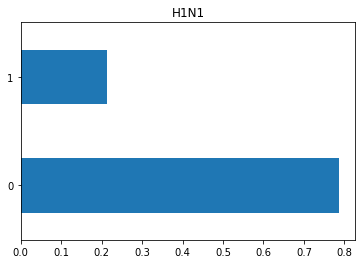

In [21]:
#Distribution of H1N1 labels in train_set
labels.h1n1_vaccine.value_counts(normalize=True).plot(kind='barh', title='H1N1')

<AxesSubplot:>

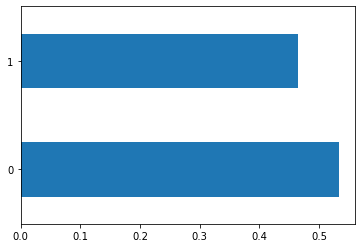

In [22]:
#Distribution of seasonal_flu labels in train_set
labels.seasonal_vaccine.value_counts(normalize=True).plot(kind='barh')

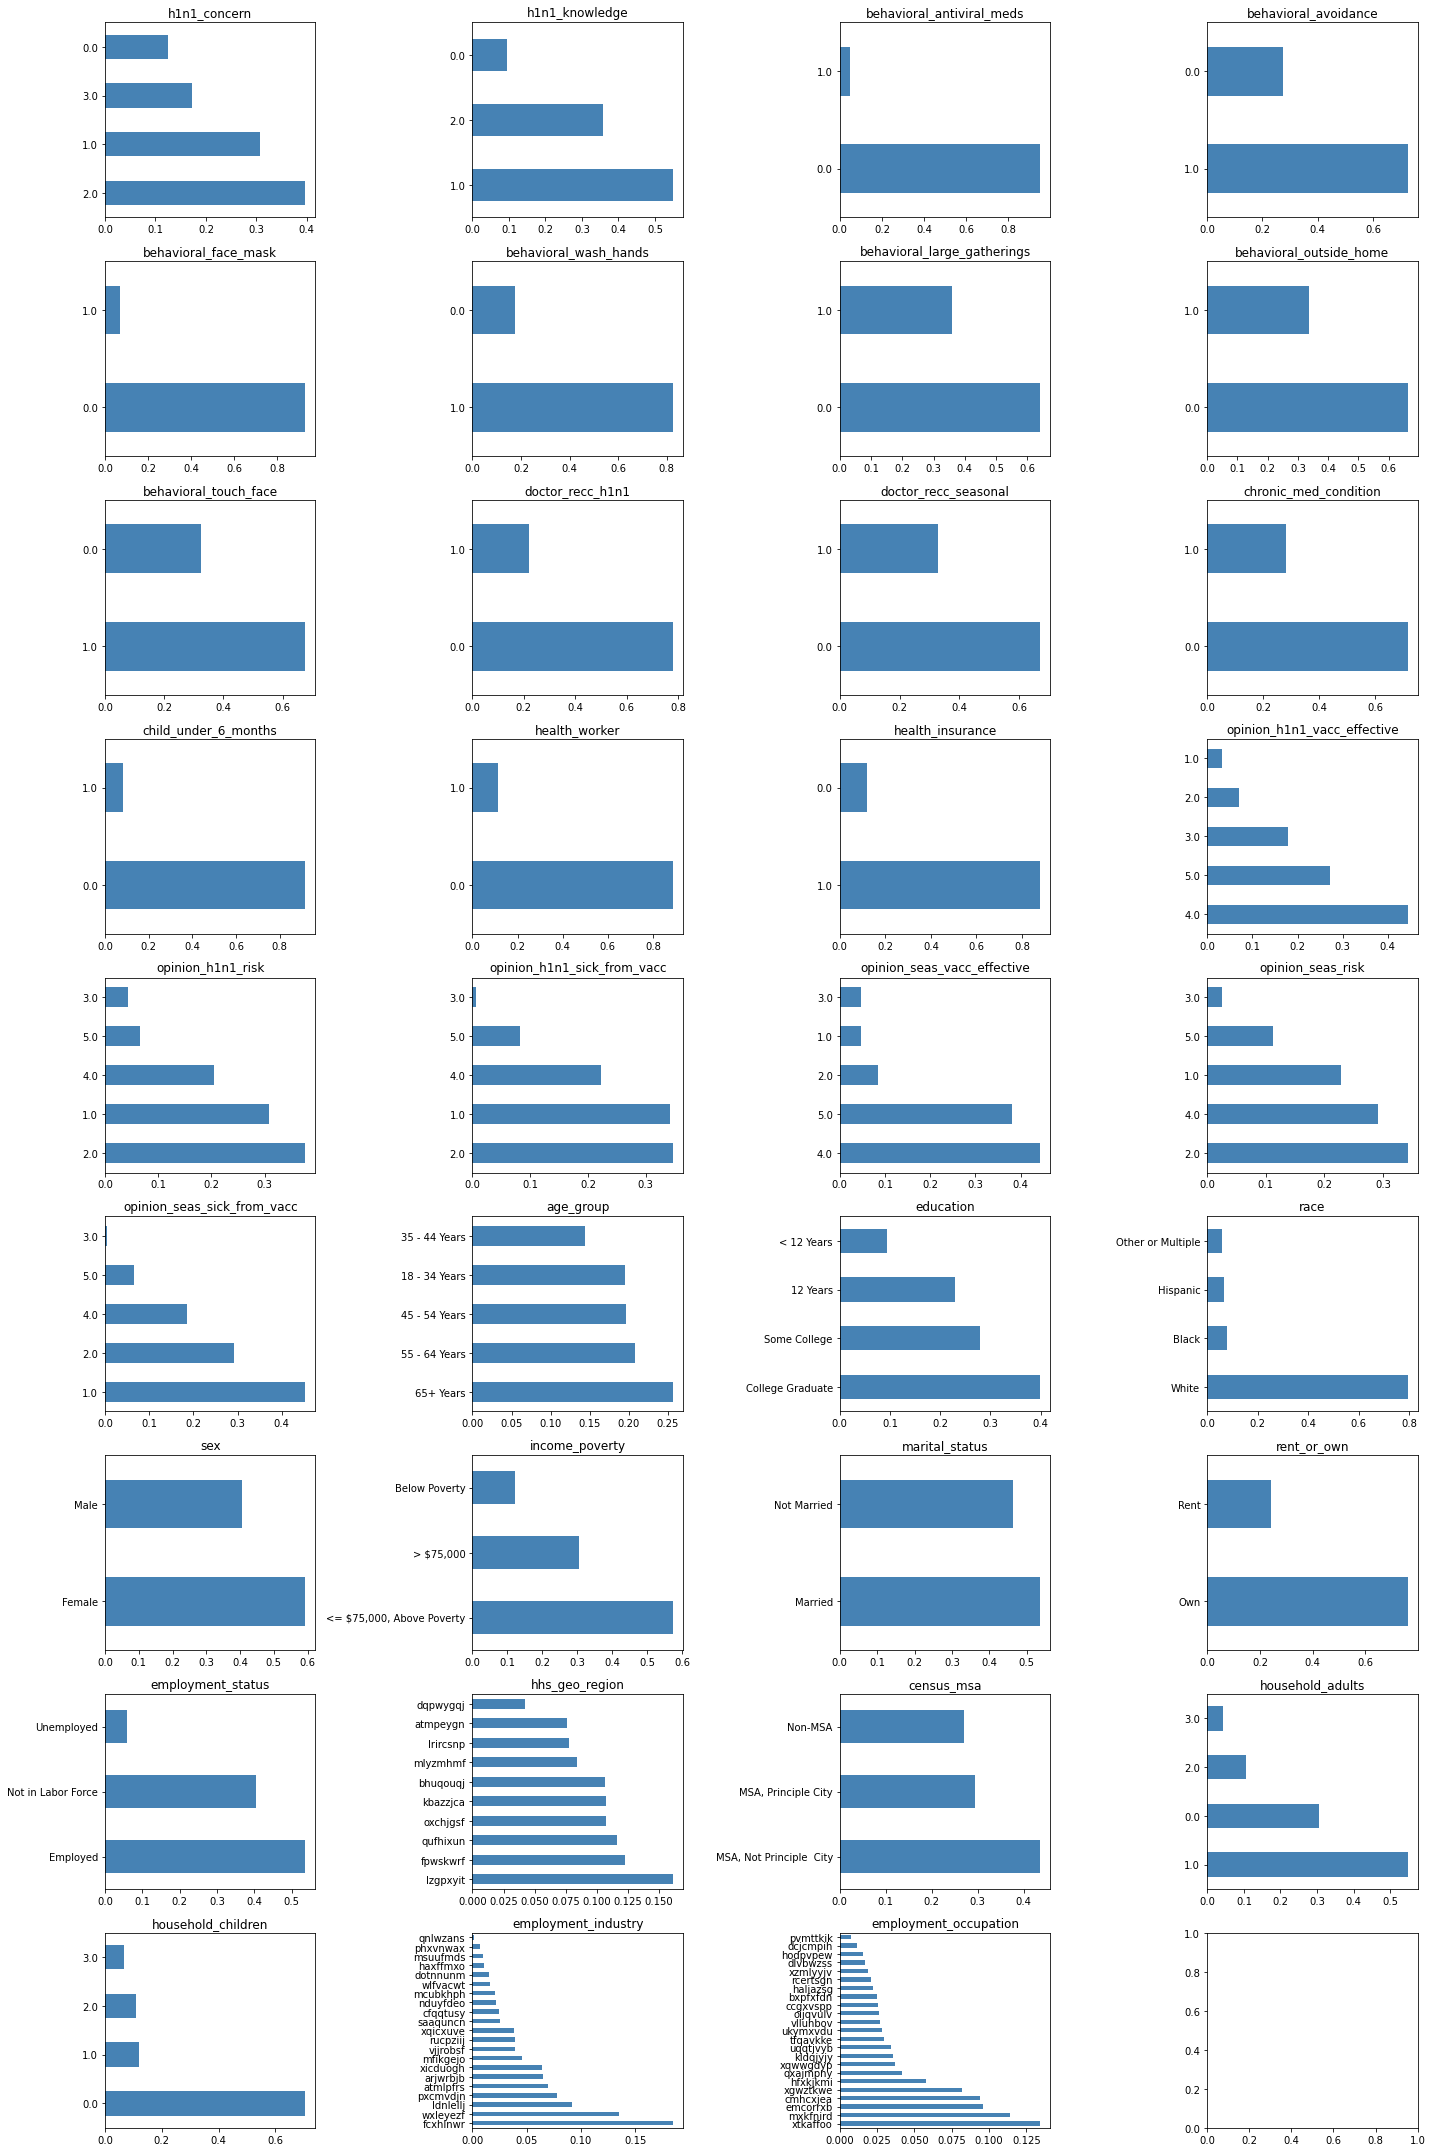

In [23]:
#Distribution of all features in train_set
df_cat = features.drop("respondent_id", axis=1).astype('category')
fig, axes = plt.subplots(9, 4,  sharex=False, figsize=(20,30)
)
for ax, col in zip(axes.flatten(), df_cat.columns):
    df_cat[col].value_counts(normalize=True).plot(kind='barh', stacked=True, ax=ax, title=col, color='steelblue')

fig.tight_layout()

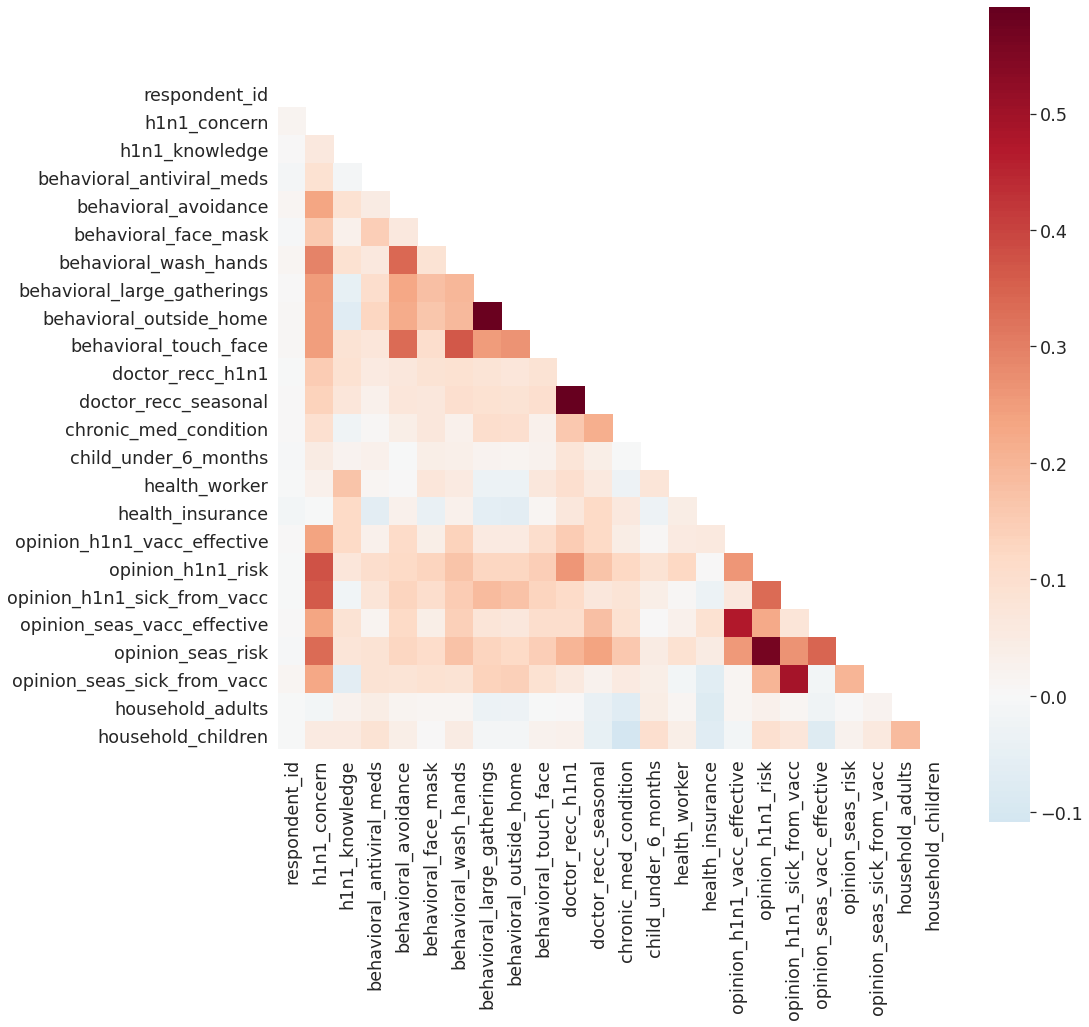

In [24]:
#Correlation matrix of all numerical features
corr =features.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.6)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask, square=True, cmap='RdBu_r', center=0)
plt.savefig('correlation_matrix.png', bbox_inches='tight')

In [25]:
features.set_index('respondent_id', inplace=True)

In [26]:
merged_df = features.join(labels)
num_merged_df = merged_df.loc[:, merged_df.dtypes != 'object'].copy()
rel_h1n1 = num_merged_df.drop(['respondent_id', 'seasonal_vaccine'], axis=1)

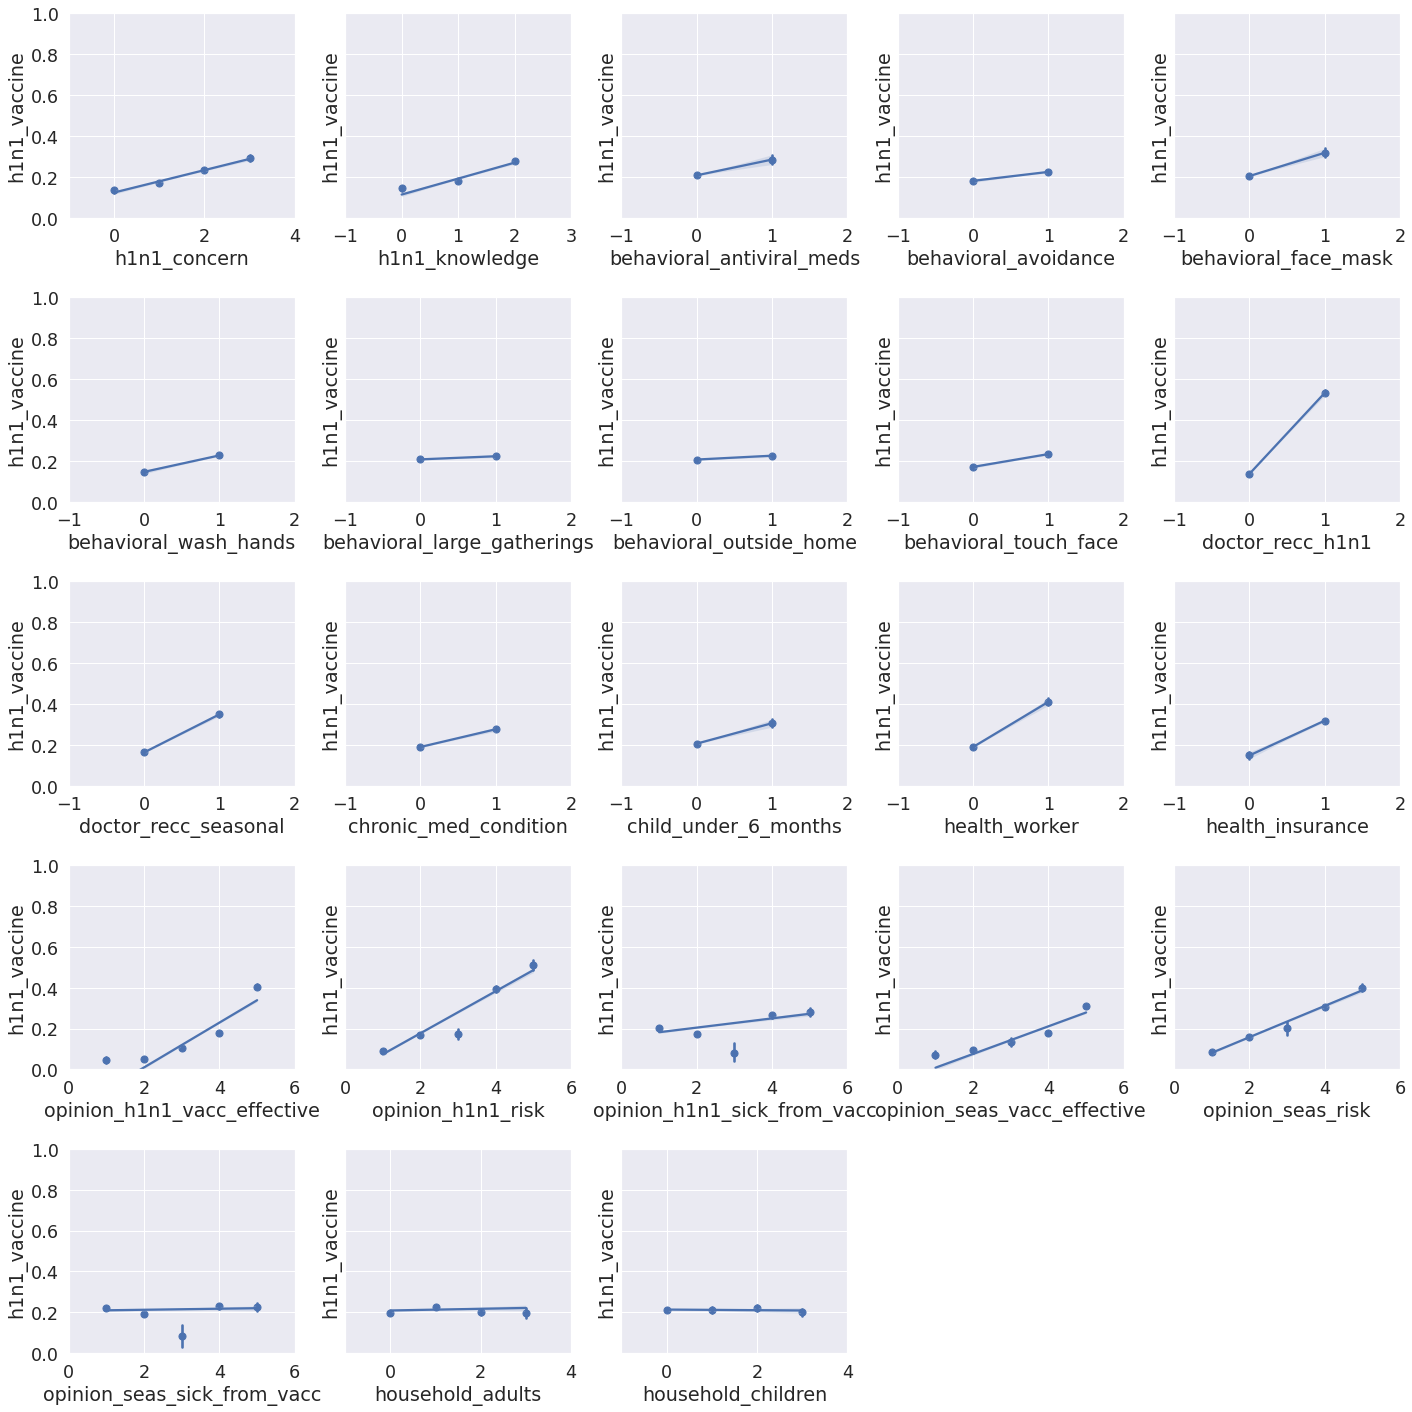

In [27]:
fig, axes = plt.subplots(5, 5,  sharey=True, figsize=(20,20))
axes[4,4].set_visible(False)
axes[4,3].set_visible(False)

for ax, col in zip(axes.flatten(), rel_h1n1.columns[:-1]):
    sns.regplot(data=rel_h1n1, y=rel_h1n1.columns[-1], x=col, ax=ax,
                x_estimator=np.mean #nicer plot for binary
                )
    ax.set_ylim(0,1)
    ax.set_xlim(rel_h1n1[col].min()-1, rel_h1n1[col].max()+1)

fig.tight_layout()

# Cleaning the data